# Descrição

Ensaio de Algoritmos de Clusterização

Algoritmos Utilizados:
    
- KMeans
- Affinity Propagation

Métricas de Performance

- Silhouette Score

# Imports

In [130]:
import pandas as pd
import seaborn as sns
from sklearn import cluster as ct
from sklearn import metrics as mt

# Carregando Dados

In [131]:
# Dados de Treino
X_data = pd.read_csv('datasets/clusterizacao/X_dataset.csv')

In [132]:
print(f'Dados de Treino:    Linhas: {X_data.shape[0]}   Colunas: {X_data.shape[1]}')

Dados de Treino:    Linhas: 178   Colunas: 13


In [133]:
X_data.head()

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963


# Ensaio

Parametros otimizados

| Modelo  |   Parametro   |
| ------- | ------------- |
| KMeans  |      K        |
| Affinity Propagation |   preference |

## Fine Tuning

### KMeans

In [134]:
k_results = pd.DataFrame()
for k in range(2, 30):
    # model definition
    kmeans_model = ct.KMeans(n_clusters=k, n_init='auto')

    # model fit
    kmeans_model.fit(X_data)

    # model predict
    labels = kmeans_model.predict(X_data)

    # performance
    i_results = mt.silhouette_score( X_data, labels)
    i_results = pd.DataFrame({'K': k, 'SS Score': i_results}, index=[0])
    k_results = pd.concat([k_results, i_results], axis=0)
    

<Axes: xlabel='K', ylabel='SS Score'>

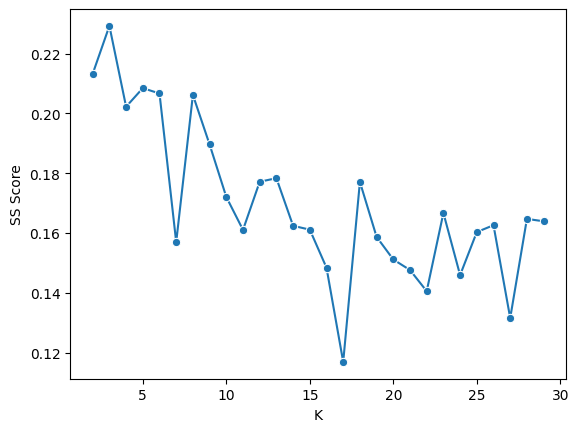

In [135]:
sns.lineplot(x='K', y='SS Score', data=k_results, marker='o')

In [136]:
k_max = k_results.loc[k_results['SS Score'] == k_results['SS Score'].max(), 'K'][0]

### Affinity Propagation

In [137]:
P_results = pd.DataFrame()
for p in range(-100, -1):
    # model defintion
    aff_model = ct.AffinityPropagation(preference=p)

    # model fit
    aff_model.fit(X_data)

    # model predict
    labels = aff_model.predict(X_data)

    # # performance
    p_results = mt.silhouette_score(X_data, labels)
    p_results = pd.DataFrame({'P': p, 'SS Score': p_results}, index=[0])
    P_results = pd.concat([P_results, p_results], axis=0)

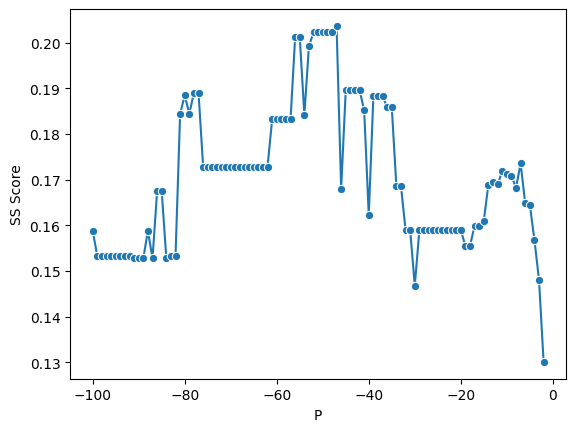

In [138]:
sns.lineplot(x='P', y='SS Score', data=P_results, marker='o');

## Definindo parametros do modelo

In [139]:
k_max = k_results.loc[k_results['SS Score'] == k_results['SS Score'].max(), 'K'][0]
preference_max = P_results.loc[P_results['SS Score'] == P_results['SS Score'].max(), 'P'][0]

## Definindo Parametros do Ensaio

In [140]:
ensaio_parameters = {
    'KMeans': ct.KMeans(n_clusters=k_max, n_init='auto'),
    'Affinity Propagation': ct.AffinityPropagation(preference=preference_max)
}

# Resultados Finais

In [141]:
def ml_metrics(model_name, data, labels):
    ss_score = mt.silhouette_score(data, labels)
    results = pd.DataFrame({'Model name': model_name,'SS Score': ss_score}, index=[0])
    return results

In [142]:
def ensaio(ensaio_parameters, data):
    
    ensaio_results = pd.DataFrame()
    
    for model_name in list(ensaio_parameters.keys()):
        
        # model fit
        ensaio_parameters[model_name].fit(data)

        # model predict
        labels = ensaio_parameters[model_name].predict(data)

        # metrics
        i_results = ml_metrics(model_name, data, labels)
        ensaio_results = pd.concat([ensaio_results, i_results], axis=0)
        
    return ensaio_results

In [143]:
ensaio(ensaio_parameters, X_data)

,Model name,SS Score
0,KMeans,0.230648
0,Affinity Propagation,0.203658
